In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['User ID','Gender','Age','AnnualSalary','Purchased']
#Read the given CSV file, and view some sample records
df = pd.read_csv("car_data.csv" )
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [33]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


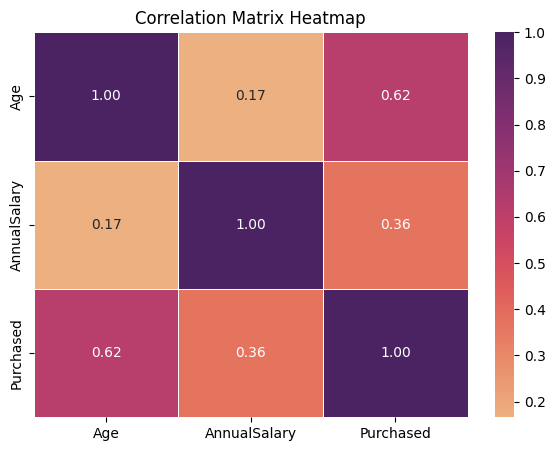

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


In [39]:
correlation_matrix = df[[ 'Age', 'AnnualSalary', 'Purchased']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
df.corr()

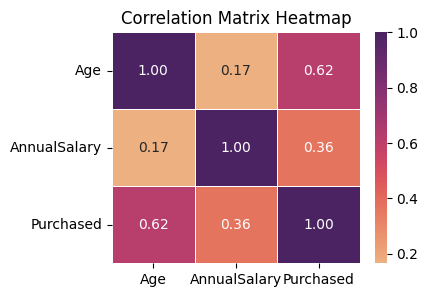

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


In [38]:
df = df[['Age', 'AnnualSalary', 'Purchased']]
correlation_matrix = df.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
df.corr()


In [ ]:
df.head()

,Age,AnnualSalary,Purchased
0,35,20000,0
1,40,43500,0
2,49,74000,0
3,40,107500,1
4,25,79000,0


In [8]:
# split dataset in features and target variables
feature_cols = ['User ID','Age','AnnualSalary']
X=df[feature_cols]
y=df.Purchased

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [23]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)



LogisticRegression(random_state=16)

In [24]:
y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,  16],
       [ 25,  69]], dtype=int64)

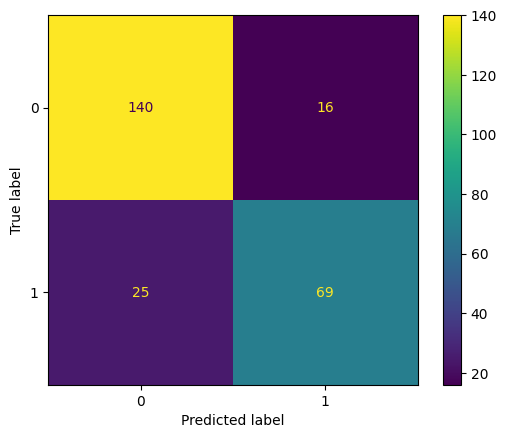

In [46]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
#plt.xlabel("Predicted")
#lt.ylabel("Actual")

cm_display.plot()
plt.show()

In [47]:
from sklearn.metrics import classification_report
target_names = ['purchased', 'not prchased']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   purchased       0.85      0.90      0.87       156
not prchased       0.81      0.73      0.77        94

    accuracy                           0.84       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.83      0.84      0.83       250



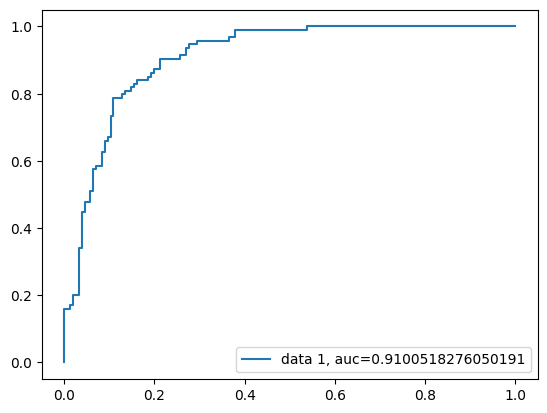

In [48]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()